<a href="https://colab.research.google.com/github/jjoo1229/machine-learning-and-deep-learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0day8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

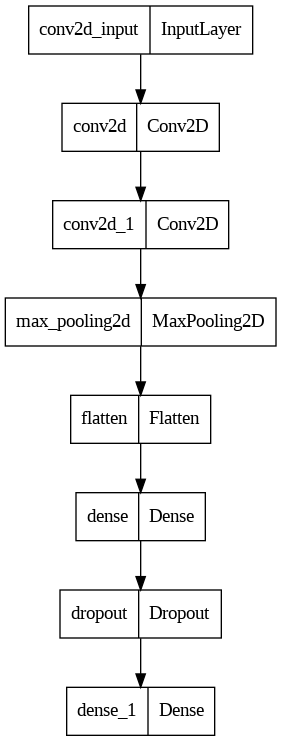

In [5]:
keras.utils.plot_model(model)

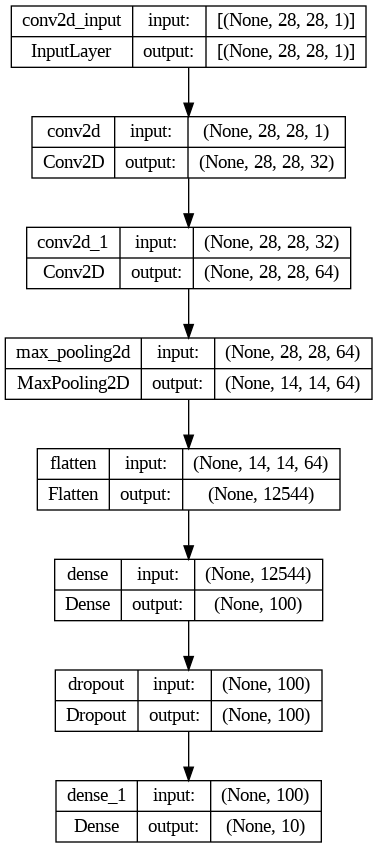

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 5ms/step - loss: 0.4818 - accuracy: 0.8309 - val_loss: 0.2997 - val_accuracy: 0.8890
Epoch 2/20
   8/1500 [..............................] - ETA: 10s - loss: 0.3021 - accuracy: 0.8984

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 9s 6ms/step - loss: 0.3123 - accuracy: 0.8895 - val_loss: 0.2674 - val_accuracy: 0.9013
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2632 - accuracy: 0.9055 - val_loss: 0.2462 - val_accuracy: 0.9082
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2232 - accuracy: 0.9175 - val_loss: 0.2247 - val_accuracy: 0.9187
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1954 - accuracy: 0.9267 - val_loss: 0.2356 - val_accuracy: 0.9186
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1720 - accuracy: 0.9360 - val_loss: 0.2173 - val_accuracy: 0.9227
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1489 - accuracy: 0.9446 - val_loss: 0.2169 - val_accuracy: 0.9237
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1311 - accuracy: 0.9505 - val_loss: 0.2340 - val_accuracy: 0.9224
Epo

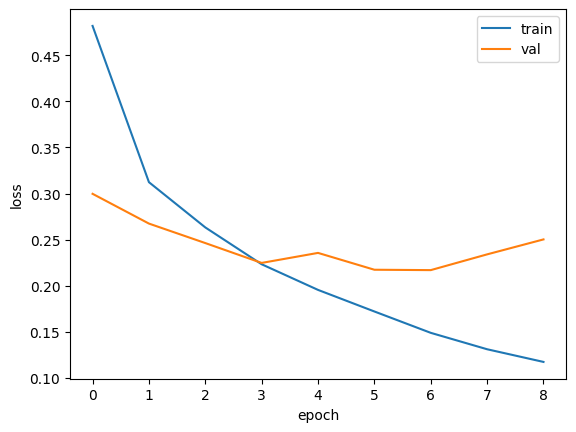

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2169 - accuracy: 0.9237


[0.21689078211784363, 0.9236666560173035]

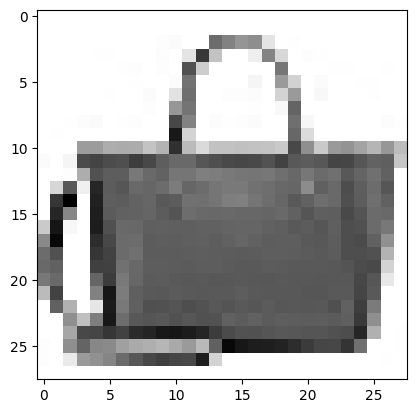

In [10]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [11]:
model.predict(val_scaled[0:1])

1/1 [==============================] - 0s 222ms/step


array([[1.8718693e-23, 3.1095229e-35, 8.2195653e-31, 7.4008234e-29,
        3.8110669e-31, 3.6658578e-27, 1.1172961e-24, 1.5410120e-27,
        1.0000000e+00, 1.0778033e-29]], dtype=float32)